# Random variables: distributions and sampling

In this lesson we recall some classical random variables (discrete and continuous) which are typically used in several real application in Bayesian modeling. We give their distributions and derive theoretically some basic characteristics. We will then sample from these distributions and verify empirically the previously obtained quantities.

## Discrete distributions: 

Discrete random variables take values over a countable set of possible values.

### Bernoulli distribution $(\theta)$:

The Bernoully random variable is typically used to describe an experiment in which you could have 2 outputs (success and failure). It depends on one parameter, $\theta$. Let $X\sim\mathcal{B}(\theta)$, then $X$ takes the value 1 with probability $\theta$ and the value 0 with probability $1-\theta$. 

$p(X=1)=\theta=1-p(X=0)$.

$E(X)=\theta$, $Var(X)=\theta(1-\theta)$.

Frequnce of 1s = 0.39
Mean = 0.4
Variance = 0.24
The sampling mean and variance are respectively 0.39 and 0.24


/home/joris/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Bernoulli'), Text(0, 0.5, 'Frequency')]

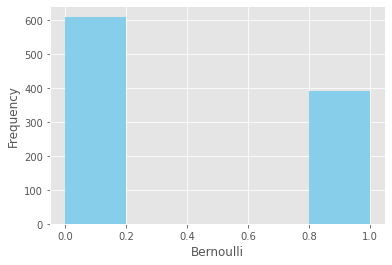

In [1]:
from scipy.stats import bernoulli
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

theta = 0.4
N = 1000

# Generate N Bernoulli trials
x = bernoulli.rvs(p=theta, size=N)

# Print frequence of occurrence of 1 in x:
occurrences1 = np.count_nonzero(x == 1)

print(f"Frequnce of 1s = {occurrences1/N}")

# Evaluate mean and variance
mean_x = bernoulli.mean(p=theta)
var_x = bernoulli.var(p=theta)

print(f"Mean = {mean_x}")
print(f"Variance = {var_x}")

# Sampling mean and variance
sample_mean = np.mean(x)
sample_var = np.var(x)
print(
    "The sampling mean and variance are respectively {0:.2f} and {1:.2f}".format(
        sample_mean, sample_var
    )
)

ax = sns.distplot(x, kde=False, color="skyblue", hist_kws={"linewidth": 15, "alpha": 1})
ax.set(xlabel="Bernoulli", ylabel="Frequency")


**Exercise.** Derive the expectation and variance for a random variable $X\sim\mathcal{B}(\theta)$.

### Binomial distribution $(n,\theta)$:

The Binomial distribution is the random variable resulting from the sum of $n$ independent Bernoulli random variables: it counts the number of success after $n$ independent Bernoulli trials with parameter $\theta$. Let $X\sim\textrm{Binomial}(n,\theta)$, then $X:=\sum_{i=1}^nY_i$, where $Y_i$ are iid $\mathcal{B}(\theta)$. $X$ can take any value in the set $\{0,\dots,n\}$.

For all $k=0,\dots,n$: $p(X=k)={{n}\choose{k}}\theta^k(1-\theta)^{n-k}$, where ${{n}\choose{k}}:=\frac{n!}{k!(n-k)!}$ is the binomial coefficient.

$E(X)=n\theta$, $Var(X)=n\theta(1-\theta)$.

**Exercise.** Generate $N$ Binomial experiment with given $n, \theta$ and compare the theoretical and the sampling mean and variance. Comment the frequency plot.

In [30]:
import plotly.express as px
from scipy.stats import binom



N = 100
n_repeats = 10**4
theta = 0.05
n_successes = [binom.rvs(N, theta) for i in range(n_repeats)]
print(f"Variance: {np.var(n_successes)}")
px.histogram(n_successes, nbins=30)

Variance: 4.81159391


**Exercise.** Derive the expectation and variance for a random variable $X\sim\textrm{Binomial}(n,\theta)$.

By linearity of the expectation:
\begin{align*}
\mathbb{E}[X]
&= \sum_{i=1}^n \mathbb{E}[X_i] \\
&= \sum_{i=1}^n \theta \\
&= n\theta \\
\end{align*}
Now for the variance:
\begin{align*}
\mathbb{V}[X] 
&= \mathbb{E}[X^2] - \mathbb{E}^2[X] \\
&= n\left( 0^2 (1 - \theta) + 1^2 \theta \right) - n \theta^2 \\
&= n \theta - n \theta^2 \\
&= n \theta \left(1 - \theta \right) \\
\end{align*}


## Continuous distributions: 

We introduce some continuous random variables supported on $\mathbb{R}$ or on intervals of the real line. Continuous random variables are typically characterized through their *probability density function* (pdf), which describes somehow the probability that the random variable falls within a specific interval. Indeed, in the continuous case, the probability that $X$ is equal a specific point in the real line will be always equal to zero due to the dimension of the considered interval. 

Let us supposed that $X$ is a continuous random variable defined over $\mathbb{R}$, $\textrm{pdf}_X$ its probability density function:

$p(a\leq X\leq b)=\int_a^b \textrm{pdf}_X(x)dx$

### Uniform distribution $(a,b)$:

Given an interval $[a,b]\in\mathbb{R}$, a uniform random variable over $[a,b]$ can takes with equal (uniform) probability any value in the interval $[a,b]$.  

Let $X\sim\mathcal{U}(a,b)$, then $\textrm{pdf}_X(x) = \frac{1}{b-a}\mathbb{I}_{[a,b]}(x)$,

where $\mathbb{I}_{[a,b]}(x)$ denotes the indicator function, $\mathbb{I}_{[a,b]}(x)=1$ if $x\in[a,b]$, 0 otherwise.

$E(X)=\frac{1}{2}(a+b)$, $Var(X)=\frac{1}{12}(b-a)^2$

Mean = 3.5
Variance = 0.75
The sampling mean and variance are respectively 3.52 and 0.77


/home/joris/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



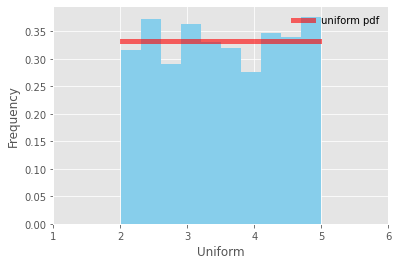

In [32]:
from scipy.stats import uniform
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

a = 2
b = 5
N = 1000

# Generate N random number from U(a,b)
x = uniform.rvs(loc=a, scale=b - a, size=N)

# Evaluate mean and variance
mean_x = uniform.mean(loc=a, scale=b - a)
var_x = uniform.var(loc=a, scale=b - a)

print(f"Mean = {mean_x}")
print(f"Variance = {var_x}")

# Sampling mean and variance
sample_mean = np.mean(x)
sample_var = np.var(x)
print(
    f"The sampling mean and variance are respectively {sample_mean:.2f} and {sample_var:.2f}"
)

x_lin = np.linspace(
    uniform.ppf(0.01, loc=a, scale=b - a), uniform.ppf(0.99, loc=a, scale=b - a), 100
)

ax = sns.distplot(
    x,
    norm_hist=True,
    kde=False,
    color="skyblue",
    hist_kws={"linewidth": 15, "alpha": 1},
)
ax.set_xlim([a - 1, b + 1])
ax.plot(
    x_lin,
    uniform.pdf(x_lin, loc=a, scale=b - a),
    "r-",
    lw=5,
    alpha=0.6,
    label="uniform pdf",
)
ax.set(xlabel="Uniform", ylabel="Frequency")
ax.legend(loc="best", frameon=False)


**Exercise.** Derive the expectation and variance for a random variable $X\sim\mathcal{U}(a,b)$.

\begin{align*}
\mathbb{E}[X]
&= \int_{x=a}^{b} \frac{x}{b-a} dx \\
&= \frac{b^2}{2(b-a)} - \frac{a^2}{2(b-a)} \\
&= \frac{1}{2}(a+b) \\
\end{align*}

\begin{align*}
\mathbb{V}[X]
&= - \frac{1}{4}(a+b)^2 + \int_{x=a}^b x^2 f(x) dx \\
&= - \frac{1}{4}(a+b)^2 + \int_{x=a}^b x^2 \frac{1}{b-a} dx \\
&= - \frac{1}{4}(a+b)^2 + \frac{1}{3(b-a)} \left[ x^3 \right]_{x=a}^b \\
&= - \frac{1}{4}(a+b)^2 - \frac{1}{3(b-a)} \left[ a^3 - b^3 \right] \\
&= - \frac{1}{4}(a+b)^2 - \frac{1}{3(b-a)} \left( a - b \right) \left( a^2 + ab + b^2 \right) \\
&= - \frac{1}{4}(a+b)^2 + \frac{1}{3} \left( a^2 + ab + b^2 \right) \\
&= - \frac{3(a+b)^2 + 4 ( a^2 + ab + b^2 )}{12} \\
&= \frac{(b-a)^2}{12} \\
\end{align*}

### Beta distribution $(\alpha,\beta)$:

The Beta distribution is defined on the interval $[0,1]$. It is the *conjugate prior probability distribution* for the Bernoulli and Binomial distributions (you will talk later about conjugate prior probability distributions). 

Let $X\sim\textrm{Beta}(\alpha,\beta)$, then $\textrm{pdf}_X(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}\mathbb{I}_{[0,1]}(x)$, 

where $B(\alpha,\beta)=\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$ is the beta function, 

and $\Gamma(z)=\int_0^\infty y^{z-1} e^{-y} dy$ is the gamma function. 

Note that for all positive integer $n$, $\Gamma(n)=(n-1)!$. It holds true that: $\Gamma(z+1)=z\Gamma(z)$.

We can prove that: $B(\alpha,\beta)=\int_0^1 x^{\alpha-1}(1-x)^{\beta-1}\,dx$

$E(X)=\frac{\alpha}{\alpha+\beta}$, $Var(X)=\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$

**Exercise.** Generate $N$ random numbers from a Beta distribution with given parameters $\alpha,\beta$. Verify if the sample and theoretical mean and variance are in line and compare the normalized frequency histogram with the Beta pdf.

In [63]:
from scipy.stats import beta

a = 2
b = 5
N = 100000
sample = beta.rvs(a=a, b=b, size=N)
print(f"Sample mean: {np.mean(sample):.4f}")
print(f"Sample var: {np.var(sample):.4f}")

print(f"Theoretical mean: {beta(a=a, b=b).mean():.4f}")
print(f"Theoretical var: {beta(a=a, b=b).var():.4f}")

px.histogram(sample)

Sample mean: 0.2854
Sample var: 0.0254
Theoretical mean: 0.2857
Theoretical var: 0.0255


**Exercise.** Derive the expectation and variance for a random variable $X\sim\textrm{Beta}(\alpha,\beta)$.

We have that 
\begin{align*}
B(\alpha,\beta)
&= \int_0^1 x^{\alpha-1} (1-x)^{\beta-1} dx \\
&= \int_0^1 x^{\alpha-1} (1-x)^{\beta-1} dx \\
\end{align*}

\begin{align*}
\mathbb{E}[X]
&= \int_{x=0}^1 xf(x) dx \\
&= \int_{x=0}^1 x\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}\mathbb{I}_{[0,1]}(x) dx \\
&= \frac{1}{B(\alpha,\beta)} \int_{x=0}^1 x^{(\alpha+1)-1}(1-x)^{\beta-1} dx \\
&= \frac{\Gamma(\alpha + 1)\Gamma(\beta)}{\Gamma(\alpha + 1 + \beta)} / \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)} \\
&= \frac{\Gamma(\alpha + 1)\Gamma(\beta) \Gamma(\alpha + \beta)}{\Gamma(\alpha + 1 + \beta)\Gamma(\alpha)\Gamma(\beta)} \\
&= \frac{\alpha}{\alpha + \beta} \\
\end{align*}

\begin{align*}
\mathbb{E}[X^2]
&= \int_{x=0}^1 x^2 f(x) dx \\
&= \int_{x=0}^1 x^2 \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}\mathbb{I}_{[0,1]}(x) dx \\
&= \frac{1}{B(\alpha,\beta)} \int_{x=0}^1 x^{(\alpha+2)-1}(1-x)^{\beta-1} dx \\
&= \frac{\Gamma(\alpha + 2)\Gamma(\beta)}{\Gamma(\alpha + 2 + \beta)} / \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)} \\
&= \frac{\Gamma(\alpha + 2) \Gamma(\alpha + \beta)}{\Gamma(\alpha + 2 + \beta)\Gamma(\alpha)} \\
&= \frac{\alpha(\alpha + 1)}{(\alpha + \beta + 1) (\alpha + \beta)} \\
\end{align*}

\begin{align*}
\mathbb{E}[X^2] - \mathbb{E}^2[X]
&= \ldots \\
&= \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)} \\
\end{align*}

### Normal (or Gaussian) distribution $(\mu,\sigma^2)$:

The normal or Gaussian distribution is supported on the entire real line. It appears to be very useful in several real applications. It is an indispensable distribution in statistics, due also to the importance of results such as the *central limit theorem*. 

Let $X\sim\mathcal{N}(\mu,\sigma^2)$, then for all $x\in\mathbb{R}$, $\textrm{pdf}_X(x)=\frac{1}{\sigma\sqrt(2\pi)}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$.

$E(X)=\mu$, $Var(X)=\sigma^2$

In [64]:
from scipy.stats import norm


**Exercise.** Derive the expectation and variance for a random variable $X\sim\mathcal{N}(\mu,\sigma^2)$. 

*Tip.* Use the moment generating function.

*Recall.* The gaussian integral: $\int_{\mathbb{R}}exp\left(-v^2\right)dv=\sqrt{\pi}$

\begin{align*}
M_X (t)
&= \mathbb{E}[e^{tX}] \\
&= \int_{-\infty}^{\infty} e^{tx} \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} dx \\
&= \frac{1}{\sigma\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{tx} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} dx \\
&= \frac{1}{\sigma\sqrt{2\pi}} \int_{-\infty}^{\infty} \exp\left(tx - \frac{1}{2}\left( \frac{x-\mu}{\sigma}\right)^2 \right) dx \\
&= \frac{1}{\sigma\sqrt{2\pi}} \int_{-\infty}^{\infty} \sigma \sqrt{2} \exp\left(t (\sigma \sqrt{2} u + \mu) - u^2 \right) du \quad \text{with } u = \frac{x-\mu}{\sigma \sqrt{2}} \\
&= \frac{1}{\sqrt{\pi}} \int_{-\infty}^{\infty} \exp\left(t (\sigma \sqrt{2} u + \mu) - u^2 \right) du \\
&= \frac{\exp(t\mu)}{\sqrt{\pi}} \int_{-\infty}^{\infty} \exp\left(\sqrt{2} t \sigma u - u^2 \right) du \\
&= \frac{\exp(t\mu)}{\sqrt{\pi}} \int_{-\infty}^{\infty} \exp\left( -\left(u + \frac{1}{\sqrt{2}} t \sigma \right)^2 + \frac{t^2 \sigma^2}{2} \right) du \\
&= \frac{\exp(t\mu + \frac{t^2 \sigma^2}{2})}{\sqrt{\pi}} \int_{-\infty}^{\infty} \exp\left( -\left(u + \frac{1}{\sqrt{2}} t \sigma \right)^2 \right) du \\
&= \frac{\exp(t\mu + \frac{t^2 \sigma^2}{2})}{\sqrt{\pi}} \int_{-\infty}^{\infty} \exp\left( -v^2 \right) dv \\
&= \exp \left( t\mu + \frac{t^2 \sigma^2}{2} \right) \\
\end{align*}
Now we evaluate the expectation:
\begin{align*}
\mathbb{E}[X]
&= \frac{d}{dt} M_X (t) \Big|_{t=0} \\
&= \frac{d}{dt} \exp \left( t\mu + \frac{t^2 \sigma^2}{2} \right) \Big|_{t=0} \\
\end{align*}

### Expectation and variance of a Gaussian random variable

Let $X\sim\mathcal{N}(\mu,\sigma^2)$. Evaluate $E(X)$ and $Var(X)$.

In order to obtain the expectation and variance of a Gaussian random variable we introduce the moment generating function:

$M_X(t) = E(e^{tX})$, for all $x\in\mathbb{R}$.

If the $k^{\textrm{th}}$-moment of $X$ exists, then:

$E(X^k)=\frac{d^k}{dt^k}M_X(t)|_{t=0}$

Let us derive the moment generating function for a Gaussian random variable:

\begin{align}
M_X(t) & = \frac{1}{\sigma\sqrt{(2\pi)}}\int_{\mathbb{R}}exp\left(tx-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right)dx
\end{align}

We pose:

$u=\frac{x-\mu}{\sqrt{2}\sigma}\Rightarrow x = \sqrt{2}\sigma u+\mu$, $dx = \sqrt{2}\sigma du$

Substituting in the previous integral, we get:

\begin{align}
M_X(t) & = \frac{\sqrt{2}\sigma}{\sigma\sqrt{(2\pi)}}\int_{\mathbb{R}}exp\left(t(\sqrt{2}\sigma u+\mu)-u)^2\right)du\\
& = \frac{exp(\mu t)}{\sqrt{\pi}}\int_{\mathbb{R}}exp\left(-(u^2-\sqrt{2}\sigma ut)\right)du\\
\end{align}

We conveniently recombine $-(u^2-\sqrt{2}\sigma ut)$ as $-\left(u-\frac{\sqrt{2}}{2}\sigma t\right)^2+\frac{1}{2}\sigma^2t^2$, extract from the integral the term which is not dependent on $u$, and pose $v = u-\frac{\sqrt{2}}{2}\sigma t \Rightarrow du = dv$:

\begin{align}
M_X(t) & = \frac{exp\left(\mu t+\frac{1}{2}\sigma^2t^2\right)}{\sqrt{\pi}}\int_{\mathbb{R}}exp\left(-v^2\right)dv
\end{align}

The remaining integral is the well known gaussian integral and it can be shown that $\int_{\mathbb{R}}exp\left(-v^2\right)dv=\sqrt{\pi}$. So finally:

\begin{align}
M_X(t) & = exp\left(\mu t+\frac{1}{2}\sigma^2t^2\right)
\end{align}

We are now able to determine the $k^{\textrm{th}}$-moment of a Gaussian distribution by simply deriving $M_X(t)$ with respect to $t$ $k$ times and evaluating in 0. We get:

$E(X) = \frac{d}{dt}M_X(t)|_{t=0} = \mu$

$Var(X) = \frac{d^2}{dt^2}M_X(t)|_{t=0} - \mu^2 = \sigma^2$


**Question.** Without doing any calculation, what can we expect for the mean of $X$?

#### Reminder: The central limit theorem

Let $(X_n)_{n\geq 1}$ be iid random variables with mean $E(X)$ and variance $Var(X)$. Then $\sqrt{n}\left(\frac{\overline{X}_n-E(X)}{\sqrt{Var(X)}}\right)$ converges through a standard normal random variable:

$$p\left(a<\sqrt{n}\left(\frac{\overline{X}_n-E(X)}{\sqrt{Var(X)}}\right)<b\right)\rightarrow\int_a^b\frac{1}{\sqrt{2\pi}}e^{-x^2/2}dx$$

Examples of Gaussian distributed data can be found everywhere, and in some sense the Gaussian distribution is a natural approximation for many phenomena observable in the realm of data analysis. This is especially the case for measurements that *cumulate*, for example over multiple subjects or probes. This is formally stated by the central limit theorem.

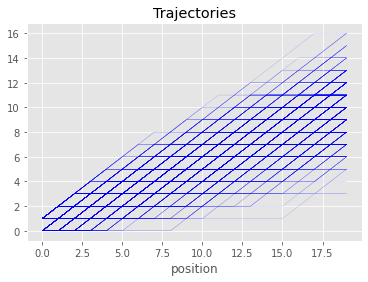

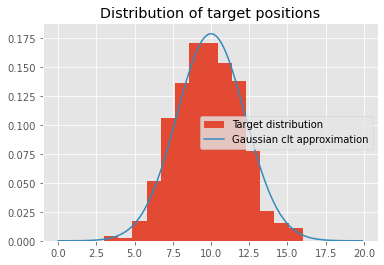

In [66]:
from scipy.stats import norm
from scipy.stats import bernoulli

path_length = 20
N_subjects = 500

prob_move = 0.5

sample = bernoulli.rvs(prob_move, size=path_length * N_subjects)

paths = np.cumsum(sample.reshape(N_subjects, path_length), 1)

[
    plt.plot(np.arange(path_length), paths[i, :], color="blue", lw=0.1)
    for i in range(N_subjects)
]
plt.title("Trajectories")
plt.xlabel("step")
plt.xlabel("position")
plt.show()


# Applying central limit theorem
bernoulli_mean = prob_move
bernoulli_var = prob_move * (1 - prob_move)

normal_clt_mean = path_length * bernoulli_mean
normal_clt_var = path_length * bernoulli_var

y = paths[:, path_length - 1]

plt.hist(y, bins=14, density=True, label="Target distribution")

x = np.arange(0, 20, 0.1)
plt.plot(
    x,
    norm.pdf(x, normal_clt_mean, np.sqrt(normal_clt_var)),
    label="Gaussian clt approximation",
)
plt.title("Distribution of target positions")
plt.legend()
plt.show()


## Link between the Bernoulli/Binomial distribution and the Beta distribution

Let us consider $n$ indipendent Bernoulli trials and the observation $y$ being the number of successes (*e.g.* the observation $y$ corresponds to the number of heads out of $n$ toss coin). We want to estimate the parameter $\theta$, which represents the probability of success of each coin toss.

The main idea at the basis of the bayesian approach is that the parameters to be estimated are not fixed (*i.e.* it actually exists a **true** value to be found), but they are instead **random variables** and we dispose of some information on its *prior distribution* (which can be more or less informative depending on our degree of confidence).

Following the Bayesian rule, we have

$$p(\theta|y)=\frac{p(y|\theta)p(\theta)}{p(y)}\propto p(y|\theta)p(\theta)$$

since $p(y)$ is independent from $\theta$, hence we could forget about that at least for the moment (it is simply a normalizing factor ensuring that the probability distribution gives 1 when integrated over all possible $\theta$).

$p(y|\theta)$ is easy to determine, since $y$ follows a Binomial distribution, $\textrm{Binomial}(n,\theta)$, hence:

$$p(y|\theta)={{y} \choose {n}}\theta^y(1-\theta)^{n-y}\propto \theta^y(1-\theta)^{n-y}$$

We will see that the Beta distribution provide us with an elegant way to specify a prior in Binomial models. 

By definition, $\theta$ should be between 0 and 1, so a good prior for $\theta$ should be a distribution whose support is $[0,1]$.

**Question.** Whcih distribution can you propose?

Let us choose as prior distribution for $\theta$, the $\textrm{Beta}(\alpha,\beta)$ distribution (*e.g.* with $\alpha=\beta=1$).

**Exercise.** Determine the posterior distribution given $p(\theta)=\textrm{Beta}(\alpha,\beta)$ (up to a costant factor)

**Exercise.** Can you see what distribution is this? Determine the right normalizing factor.

**Exercise.** Given prior parameters $\alpha = 2, \beta = 3$ and data $n=100$, and $y=30$, plot the posterior distribution for the parameter $\theta$.